<a href="https://colab.research.google.com/github/PabAleBravo/Proyectointegradorequipo14/blob/Avance1/Avance1_Equipo14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

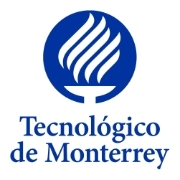


# Avance 1. Análisis exploratorio de datos

## Equipo 14

### A01793024 – Pablo Alejandro Bravo Vargas
### A00939319 - Brian Sánchez Hernández
### A00968460 - Josías Ruiz Peña


## Estructura de datos

Importar Datos del archivo de muestra de la información para su análisis.

In [36]:
import pandas as pd
import chardet

file_path = '/content/Base Flujo feb 2023.csv'

with open(file_path, 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    encoding = result['encoding']

In [37]:
df = pd.read_csv(file_path, header=0, encoding=encoding)
df.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,EspecifiqueCarga,dsMarcaAuto,LatitudExp,LongitudExp,CP,dsTipoAuto,clProveedor,Fecha_AsisConcluida,Fecha_Termino,Fecha_RegisPago
0,18971035,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Cancelado Posterior,01/02/2023 00:08,01/02/2023 00:25,01/02/2023 00:48,JALISCO,ZAPOPAN,...,NaN,TOYOTA,20.680738,-103.429520,45027.0,Yaris,10508.0,01/02/2023,03/02/2023,NaN
1,18971035,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Cancelado Posterior,01/02/2023 00:08,01/02/2023 00:35,01/02/2023 00:48,JALISCO,ZAPOPAN,...,NaN,TOYOTA,20.680738,-103.429520,45027.0,Yaris,3703.0,01/02/2023,03/02/2023,NaN
2,18971036,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,01/02/2023 00:12,01/02/2023 00:40,01/02/2023 01:45,NUEVO LEON,CIENEGA DE FLORES,...,1.5 TON DE MEDICAMENTO,FORD,25.955542,-100.227993,0.0,Ford F-350,143.0,01/02/2023,03/02/2023,05/04/2023
3,18971037,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,01/02/2023 00:11,01/02/2023 00:31,01/02/2023 00:58,CIUDAD DE MEXICO,IZTAPALAPA,...,NaN,VW,19.374680,-99.078490,9300.0,Vento,135.0,01/02/2023,05/02/2023,NaN
4,18971038,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,01/02/2023 00:15,01/02/2023 00:44,01/02/2023 03:24,NUEVO LEON,GARCIA,...,NaN,CHEVROLET,25.798126,-100.572770,66003.0,Cavalier,11335.0,01/02/2023,03/02/2023,24/03/2023


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38758 entries, 0 to 38757
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Expediente               38758 non-null  int64  
 1   Tiposervicio             38758 non-null  object 
 2   Servicio                 38758 non-null  object 
 3   SubServicio              38758 non-null  object 
 4   EstatusExp               38758 non-null  object 
 5   FechaApertura            38758 non-null  object 
 6   FechaAsignacion          33328 non-null  object 
 7   Fechallegada             31136 non-null  object 
 8   EntidadOrigen            36106 non-null  object 
 9   MunicipioOrigen          36106 non-null  object 
 10  Costo                    33322 non-null  float64
 11  CostoPagado              33321 non-null  float64
 12  lugardelevento           38758 non-null  object 
 13  EstatusProv              33327 non-null  object 
 14  dsBlindaje            

In [39]:
df_clean = df

Convertir tipo de variables

In [23]:
df_labels = ['Expediente','Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','CostoPagado','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','clProveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']

In [41]:
df_column_time = ['FechaApertura','FechaAsignacion','Fechallegada']
for col in df_column_time:
    print(col)
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y %H:%M')
df_column_date = ['Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']
for col in df_column_date:
    print(col)
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y')

FechaApertura
FechaAsignacion
Fechallegada
Fecha_AsisConcluida
Fecha_Termino
Fecha_RegisPago
Fecha_AsisConcluida
Fecha_Termino
Fecha_RegisPago


In [42]:
df_clean.loc[df_clean['CitaProg'] == 'NO', 'CitaProg'] = 0
df_clean.loc[df_clean['CitaProg'] == 'SI', 'CitaProg'] = 1

In [43]:
df_clean.loc[df_clean['importeprov'] == 'Con Costo', 'importeprov'] = 1
df_clean.loc[df_clean['importeprov'] == 'Sin Costo', 'importeprov'] = 0

In [44]:
df_column_bin = ['CitaProg','importeprov','TieneCita','ProveedorAsignado']
for col in df_column_bin:
    print(col)
    df_clean[col] = df_clean[col].astype(bool)

CitaProg
importeprov
TieneCita
ProveedorAsignado


In [45]:
df_column_class = ['Tiposervicio','Servicio','SubServicio','EstatusExp','EntidadOrigen','MunicipioOrigen','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','dsTipoAsignacion','Entidaddestino','Municipiodestino','dsMarcaAuto']
for col in df_column_class:
    print(col+'_index')
    df_clean[col+'_index'] = pd.factorize(df_clean[col])[0]

Tiposervicio
Servicio
SubServicio
EstatusExp
EntidadOrigen
MunicipioOrigen
lugardelevento
EstatusProv
dsBlindaje
ClasificaAuto
dsTipoAsignacion
Entidaddestino
Municipiodestino
dsMarcaAuto


In [60]:
df_clean['clProveedor'].fillna(0, inplace=True)
df_clean['CP'].fillna(0, inplace=True)
df_clean['Costo'].fillna(0, inplace=True)
df_clean['CostoPagado'].fillna(0, inplace=True)

In [62]:
df_column_cost = ['Costo','CostoPagado']

In [47]:
df_column_int = ['Expediente','clCuenta','CntMonitoreosAProveedor','CP','clProveedor']
for col in df_column_int:
    print(col)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').astype(int)

Expediente
clCuenta
CntMonitoreosAProveedor
CP
clProveedor


In [63]:
df_label_processed = df_column_time+df_column_date+df_column_bin+df_column_class+df_column_int+df_column_cost
df_label_processed

['FechaApertura',
 'FechaAsignacion',
 'Fechallegada',
 'Fecha_AsisConcluida',
 'Fecha_Termino',
 'Fecha_RegisPago',
 'Fecha_AsisConcluida',
 'Fecha_Termino',
 'Fecha_RegisPago',
 'CitaProg',
 'importeprov',
 'TieneCita',
 'ProveedorAsignado',
 'Tiposervicio',
 'Servicio',
 'SubServicio',
 'EstatusExp',
 'EntidadOrigen',
 'MunicipioOrigen',
 'lugardelevento',
 'EstatusProv',
 'dsBlindaje',
 'ClasificaAuto',
 'dsTipoAsignacion',
 'Entidaddestino',
 'Municipiodestino',
 'dsMarcaAuto',
 'Expediente',
 'clCuenta',
 'CntMonitoreosAProveedor',
 'CP',
 'clProveedor',
 'Costo',
 'CostoPagado']

In [65]:
df_col_class = [i for i in df_labels if i not in df_label_processed]
df_col_class

['EspecifiqueCarga', 'LatitudExp', 'LongitudExp', 'dsTipoAuto']

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38758 entries, 0 to 38757
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Expediente               38758 non-null  int64         
 1   Tiposervicio             38758 non-null  object        
 2   Servicio                 38758 non-null  object        
 3   SubServicio              38758 non-null  object        
 4   EstatusExp               38758 non-null  object        
 5   FechaApertura            38758 non-null  datetime64[ns]
 6   FechaAsignacion          33328 non-null  datetime64[ns]
 7   Fechallegada             31136 non-null  datetime64[ns]
 8   EntidadOrigen            36106 non-null  object        
 9   MunicipioOrigen          36106 non-null  object        
 10  Costo                    33322 non-null  float64       
 11  CostoPagado              33321 non-null  float64       
 12  lugardelevento           38758 n

In [51]:
df_clean.nunique()

Expediente                 36771
Tiposervicio                   7
Servicio                       2
SubServicio                    5
EstatusExp                     5
FechaApertura              20209
FechaAsignacion            19539
Fechallegada               18068
EntidadOrigen                 33
MunicipioOrigen             1076
Costo                       4338
CostoPagado                 4208
lugardelevento                 3
EstatusProv                    2
dsBlindaje                     6
ClasificaAuto                  6
CitaProg                       2
dsTipoAsignacion               6
importeprov                    2
Entidaddestino                33
Municipiodestino             597
clCuenta                     138
TieneCita                      2
ProveedorAsignado              2
CntMonitoreosAProveedor       28
EspecifiqueCarga            1005
dsMarcaAuto                   65
LatitudExp                 33926
LongitudExp                33427
CP                          7333
dsTipoAuto

In [52]:
df_clean.head()

,Expediente,Tiposervicio,Servicio,SubServicio,EstatusExp,FechaApertura,FechaAsignacion,Fechallegada,EntidadOrigen,MunicipioOrigen,...,EntidadOrigen_index,MunicipioOrigen_index,lugardelevento_index,EstatusProv_index,dsBlindaje_index,ClasificaAuto_index,dsTipoAsignacion_index,Entidaddestino_index,Municipiodestino_index,dsMarcaAuto_index
0,18971035,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Cancelado Posterior,2023-02-01 00:08:00,2023-02-01 00:25:00,2023-02-01 00:48:00,JALISCO,ZAPOPAN,...,0,0,0,0,0,0,0,0,0,0
1,18971035,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Cancelado Posterior,2023-02-01 00:08:00,2023-02-01 00:35:00,2023-02-01 00:48:00,JALISCO,ZAPOPAN,...,0,0,0,0,0,0,1,0,0,0
2,18971036,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-02-01 00:12:00,2023-02-01 00:40:00,2023-02-01 01:45:00,NUEVO LEON,CIENEGA DE FLORES,...,1,1,1,1,0,1,1,1,1,1
3,18971037,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-02-01 00:11:00,2023-02-01 00:31:00,2023-02-01 00:58:00,CIUDAD DE MEXICO,IZTAPALAPA,...,2,2,0,1,0,0,2,2,2,2
4,18971038,EMERGENCIA,Asistencia Vial,Arrastre de Grúa,Concluido,2023-02-01 00:15:00,2023-02-01 00:44:00,2023-02-01 03:24:00,NUEVO LEON,GARCIA,...,1,3,1,1,0,0,1,1,3,3


In [64]:
df_analysis = pd.DataFrame()
for col in df_label_processed:
  df_analysis[col] = df_clean[col]
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38758 entries, 0 to 38757
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FechaApertura            38758 non-null  datetime64[ns]
 1   FechaAsignacion          33328 non-null  datetime64[ns]
 2   Fechallegada             31136 non-null  datetime64[ns]
 3   Fecha_AsisConcluida      32618 non-null  datetime64[ns]
 4   Fecha_Termino            32554 non-null  datetime64[ns]
 5   Fecha_RegisPago          24119 non-null  datetime64[ns]
 6   CitaProg                 38758 non-null  bool          
 7   importeprov              38758 non-null  bool          
 8   TieneCita                38758 non-null  bool          
 9   ProveedorAsignado        38758 non-null  bool          
 10  Tiposervicio             38758 non-null  object        
 11  Servicio                 38758 non-null  object        
 12  SubServicio              38758 n

## Análisis univariante

In [29]:
df_X = ['Tiposervicio','Servicio','SubServicio','EstatusExp','FechaApertura','FechaAsignacion','Fechallegada','EntidadOrigen','MunicipioOrigen','Costo','lugardelevento','EstatusProv','dsBlindaje','ClasificaAuto','CitaProg','dsTipoAsignacion','importeprov','Entidaddestino','Municipiodestino','clCuenta','TieneCita','ProveedorAsignado','CntMonitoreosAProveedor','EspecifiqueCarga','dsMarcaAuto','LatitudExp','LongitudExp','CP','dsTipoAuto','clProveedor','Fecha_AsisConcluida','Fecha_Termino','Fecha_RegisPago']
df_Y = ['CostoPagado']

## Análisis bi/multivariante

## Preprocesamiento

## Conclusiones